In [1]:
import pandas as pd

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717


In [3]:
confirmed.shape

(274, 444)

In [4]:
confirmed['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
269               Vietnam
270    West Bank and Gaza
271                 Yemen
272                Zambia
273              Zimbabwe
Name: Country/Region, Length: 274, dtype: object

In [5]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [6]:
last_date='4/4/21'
confirmed[last_date]

0       56676
1      126531
2      117622
3       12231
4       22631
        ...  
269      2631
270    251288
271      4798
272     88930
273     36923
Name: 4/4/21, Length: 274, dtype: int64

In [7]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
4/1/21                  56517
4/2/21                  56572
4/3/21                  56595
4/4/21                  56676
4/5/21                  56717
Name: 0, Length: 444, dtype: object

In [8]:
confirmed.set_index('Province/State').loc['Anhui']

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
4/1/21                994
4/2/21                994
4/3/21                994
4/4/21                994
4/5/21                994
Name: Anhui, Length: 443, dtype: object

In [9]:
confirmed['Country/Region'].value_counts()

China                    33
Canada                   16
France                   12
United Kingdom           12
Australia                 8
                         ..
Samoa                     1
Sao Tome and Principe     1
Kazakhstan                1
Qatar                     1
Belgium                   1
Name: Country/Region, Length: 192, dtype: int64

In [10]:
confirmed_country = confirmed.groupby('Country/Region').sum()
confirmed_country

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,2421,2426,2432,2448,2448,2475,2482,2488,2494,2501,2512,2524,2526,2529,2533,2550,2553,2554,2557,2560,2567,2570,2571,2572,2572,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617,2620,2626,2631,2637
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,179293,180848,181909,183612,185336,187309,189326,191203,193029,194548,196812,198554,200382,202378,203669,205652,207436,209304,211602,213791,215984,218061,219912,221391,223638,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645,246893,248482,251288,253922
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2255,2267,2269,2285,2310,2342,2363,2375,2411,2444,2473,2545,2586,2627,2667,2729,2771,2836,2908,2969,3037,3126,3217,3278,3418,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531,4620,4697,4798,4881


In [11]:
confirmed_country.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Papua New Guinea,-6.314993,143.955550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1228,1228,1275,1275,1365,1365,1365,1365,1492,1492,1583,1670,1741,1741,1819,1819,1819,2173,2269,2351,2351,2479,2658,3085,3085,3359,3758,4109,4109,4660,4660,5184,5349,5620,5991,6112,6475,6619,7038,7406
Pakistan,30.375300,69.345100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,4,...,577482,578797,579973,581365,582528,583916,585435,587014,588728,590508,592100,593453,595239,597497,600198,602536,605200,607453,609964,612315,615810,619259,623135,626802,630471,633741,637042,640988,645356,649824,654591,659116,663200,667957,672931,678165,678165,687908,692231,696184
Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,237629,238205,239009,239617,239998,240201,240773,241392,242087,242660,243247,243526,243778,244168,244923,245452,245616,246045,246299,246794,247364,247979,248502,248989,249463,249776,250177,250579,250968,251332,251582,251983,252182,252384,252727,253196,253781,254136,254295,254435
Turkey,38.963700,35.243300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2674766,2683971,2693164,2701588,2711479,2723316,2734836,2746158,2757460,2769230,2780417,2793632,2807387,2821943,2835989,2850930,2866012,2879390,2894893,2911642,2930554,2950603,2971633,2992694,3013122,3035338,3061520,3091282,3120013,3149094,3179115,3208173,3240577,3277880,3317182,3357988,3400296,3445052,3487050,3529601
Malta,35.937500,14.375400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21724,21982,22219,22482,22657,22993,23226,23588,23871,24216,24398,24599,24847,25357,25640,25969,26267,26535,26748,27061,27272,27515,27694,27904,28128,28319,28409,28510,28612,28715,28808,28875,28938,28993,29033,29085,29127,29189,29223,29279
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717
United Arab Emirates,23.424076,53.847818,0,0,0,0,0,0,0,4,4,4,4,5,5,5,5,5,5,7,7,8,8,8,8,8,8,9,9,9,9,9,9,13,13,13,13,13,13,19,...,381662,385160,388594,391524,394050,396771,399463,402205,405277,408236,410849,413332,415705,417909,419996,422246,424405,426397,428295,430313,432364,434465,436625,438638,440355,442226,444398,446594,448637,450765,453069,455197,457071,459360,461444,463759,465939,468023,470136,472148
Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,203914,204341,204341,204341,205086,205514,205890,206293,206640,206640,206640,206640,207832,207832,207832,209093,209093,209093,209093,210447,210447,210447,211903,211903,211903,211903,213438,213438,213438,215178,215178,215178,215178,216764,216764,216764,216764,216764,216764,216764
Seychelles,-4.679600,55.492000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2562,2592,2592,2618,2688,2849,2890,2928,2950,2979,2979,3000,3032,3032,3132,3173,3173,3315,3342,3354,3486,3566,3616,3770,3770,3798,3798,3882,3882,3996,3

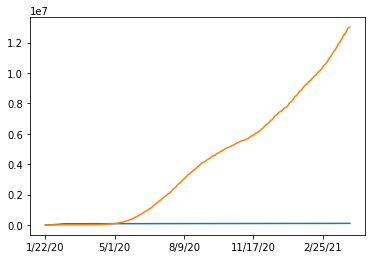

In [12]:
confirmed_country.loc['China'][2:].plot()
confirmed_country.loc['Brazil'][2:].plot()

In [13]:
import matplotlib.pyplot as plt

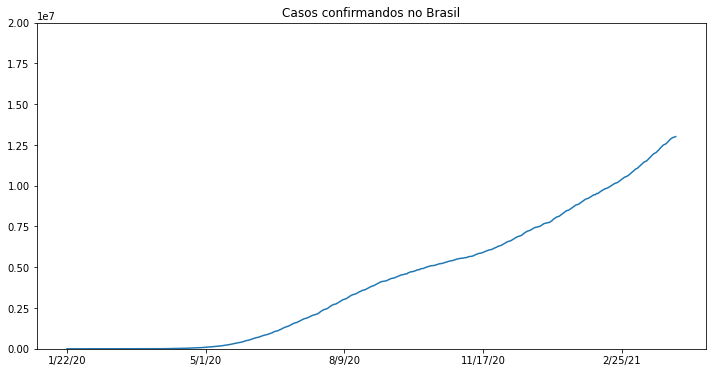

In [14]:
plt.figure(figsize=(12,6))
confirmed_country.loc['Brazil'][2:].plot()
plt.title('Casos confirmandos no Brasil')
plt.ylim(0, 20000000)
plt.show()

In [15]:
confirmed_country.loc['Brazil'][2:].diff()

1/22/20        NaN
1/23/20        0.0
1/24/20        0.0
1/25/20        0.0
1/26/20        0.0
            ...   
4/1/21     91097.0
4/2/21     70238.0
4/3/21     43515.0
4/4/21     31359.0
4/5/21     28645.0
Name: Brazil, Length: 440, dtype: float64

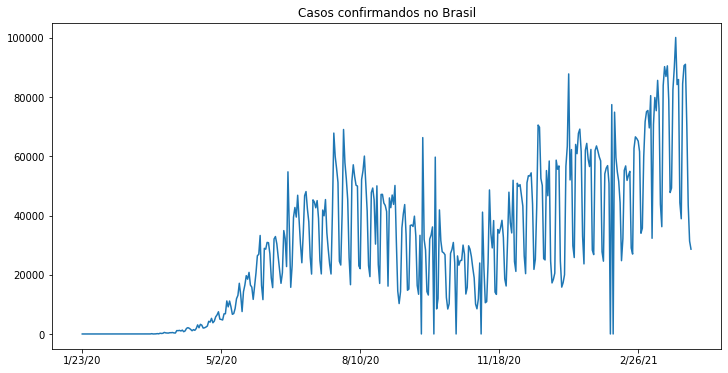

In [16]:
plt.figure(figsize=(12,6))
confirmed_country.loc['Brazil'][2:].diff().dropna().plot()
plt.title('Casos confirmandos no Brasil')
plt.show()

In [17]:
confirmed_country[last_date]

Country/Region
Afghanistan            56676
Albania               126531
Algeria               117622
Andorra                12231
Angola                 22631
                       ...  
Vietnam                 2631
West Bank and Gaza    251288
Yemen                   4798
Zambia                 88930
Zimbabwe               36923
Name: 4/4/21, Length: 192, dtype: int64

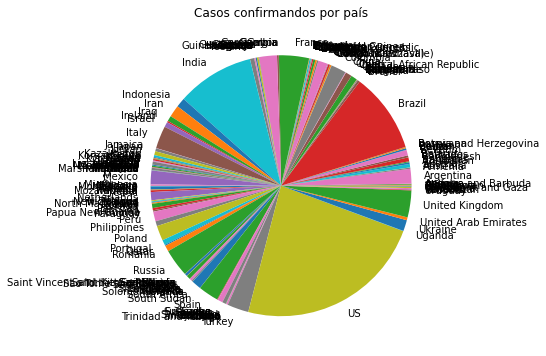

In [18]:
plt.figure(figsize=(12,6))
confirmed_country[last_date].dropna().plot(kind='pie')
plt.title('Casos confirmandos por país')
plt.show()

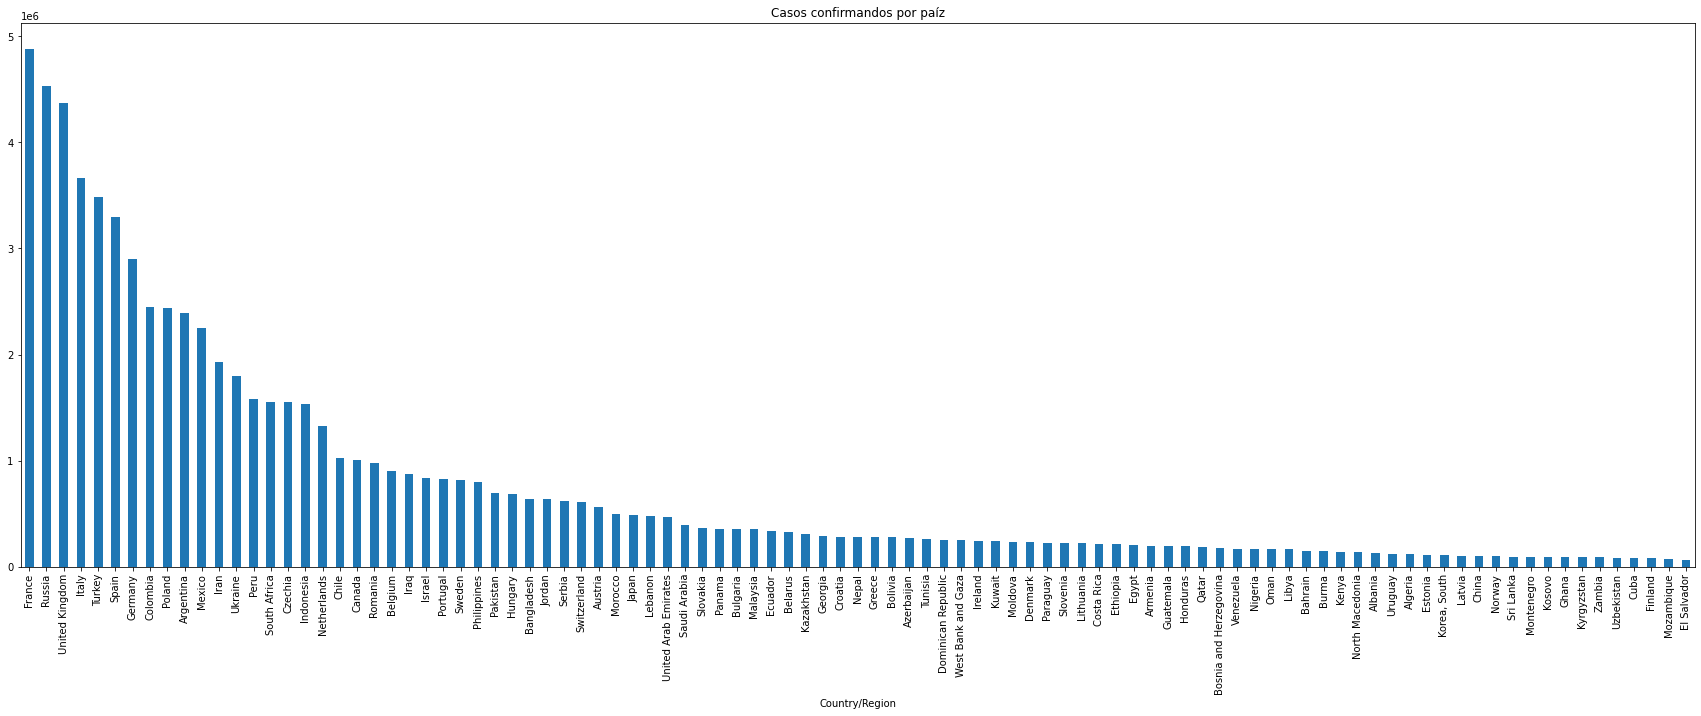

In [19]:
plt.figure(figsize=(30,10))
confirmed_country[last_date].dropna().sort_values(ascending=False)[3:100].plot(kind='bar')
plt.title('Casos confirmandos por paíz')
plt.show()

In [21]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [22]:
display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497,2508
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265,2274
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093,3096,3099,3102,3105,3108
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114,114,115,115,115,115,115,115,116,117,117,117
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532,532,533,533,534,536,537,538,538,540,542,543


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49281,49285,49288,49333,49344,49347,49359,49362,49362,49369,49378,49402,49409,49499,49499,49499,49471,49477,49481,49499,49536,49664,49681,49681,49737,49743,49752,49802,49937,49994,49994,50013,50666,51473,51550,51788,51798,51802,51885,51902
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,67158,68007,68969,69773,70413,71173,72076,72853,73610,74352,75190,75887,76784,77498,78259,79131,79821,80483,81061,81810,82554,83264,83954,84625,85147,85846,86497,87193,87760,88349,88899,89456,90024,90617,91271,91875,92500,93173,93842,94431
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,77683,77842,77976,78098,78234,78377,78524,78672,78824,78946,79064,79187,79319,79428,79556,79672,79783,79887,79994,80103,80219,80347,80455,80566,80659,80887,80981,81065,81065,81160,81242,81316,81349,81442,81538,81632,81729,81813,81896,81994
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10356,10394,10429,10446,10475,10501,10560,10564,10584,10599,10626,10661,10685,10708,10708,10754,10775,10796,10795,10861,10883,10904,10925,10952,10973,11014,11050,11082,11111,11149,11172,11204,11244,11276,11315,11365,11401,11428,11474,11523
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19238,19307,19315,19322,19400,19410,19509,19553,19624,19640,19647,19657,19677,19761,19827,19835,19848,19850,19948,19971,20028,20032,20065,20068,20073,20090,20099,20172,20190,20250,20269,20289,20380,20446,20493,20508,20867,20871,20879,21452


In [35]:
def latest_country(data):
    return data.groupby('Country/Region').sum()[last_date]

latest_country(deaths)

Country/Region
Afghanistan           2497
Albania               2265
Algeria               3105
Andorra                117
Angola                 542
                      ... 
Vietnam                 35
West Bank and Gaza    2706
Yemen                  946
Zambia                1220
Zimbabwe              1525
Name: 4/4/21, Length: 192, dtype: int64

In [58]:
inform = [latest_country(confirmed), latest_country(deaths), latest_country(recovered)]
combined = pd.concat(inform, axis=1)
combined.columns= ['confirmed', 'deaths', 'recovered']
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,56676,2497,51885
Albania,126531,2265,93842
Algeria,117622,3105,81896
Andorra,12231,117,11474
Angola,22631,542,20879


In [59]:
sum_up = combined.sum()
rate = sum_up['deaths']/sum_up['confirmed']
print(rate*100)

2.1725198321009933


In [60]:
letality_rate = combined['deaths']/combined['confirmed']*100
combined['letality_rate'] = letality_rate
combined.head()

,confirmed,deaths,recovered,letality_rate
Country/Region,,,,
Afghanistan,56676,2497,51885,4.405745
Albania,126531,2265,93842,1.790075
Algeria,117622,3105,81896,2.639812
Andorra,12231,117,11474,0.956586
Angola,22631,542,20879,2.394945


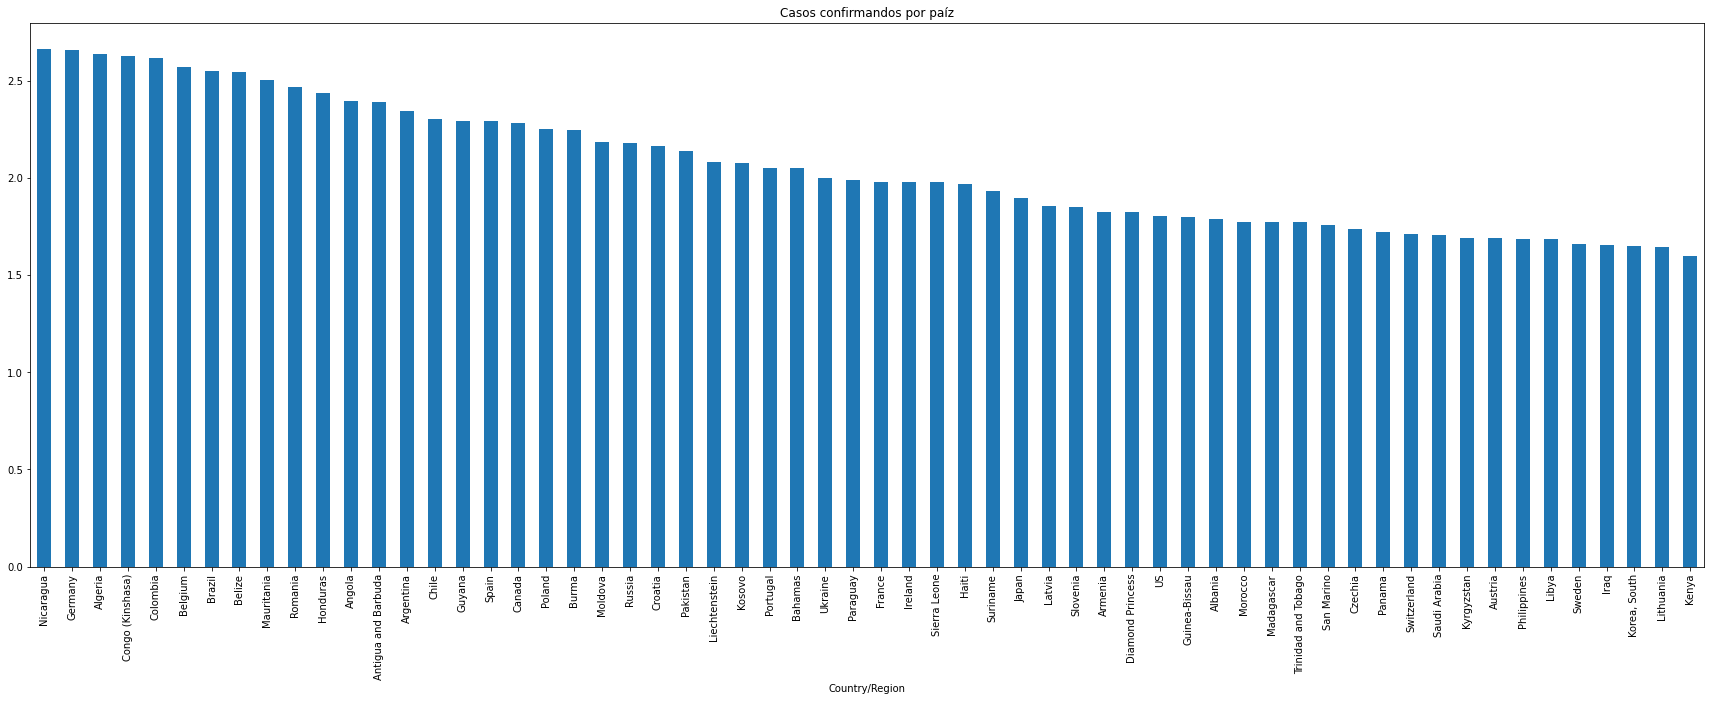

In [61]:
plt.figure(figsize=(30,10))
combined['letality_rate'].sort_values(ascending=False)[40:100].plot(kind='bar')
plt.title('Casos confirmandos por paíz')
plt.show()

In [54]:
import seaborn as sns

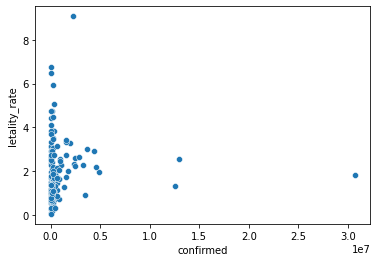

In [65]:
sns.scatterplot(data=combined.query('confirmed > 10000'), x='confirmed', y='letality_rate')

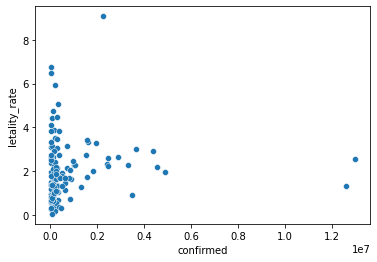

In [66]:
sns.scatterplot(data=combined.query('recovered > 10000'), x='confirmed', y='letality_rate')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


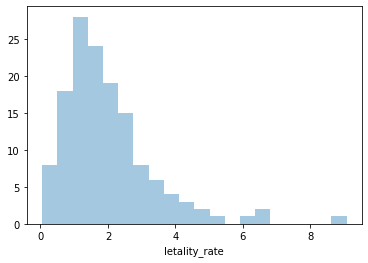

In [72]:
sns.distplot(combined.query('confirmed > 10000')['letality_rate'], kde=False, bins=20)